# 타이타닉 데이터 분석 

## 사전 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# PC에서 그림 설정
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [6, 4]})

In [7]:
# PC에서 한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [9]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [5]:
titanic = pd.read_csv('../TitanicData/titanic1309.csv')
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
1120,1121,0,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S
1234,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
1106,1107,0,1,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S


타이타닉 열(변수) 설명
survived : 0 = 사망, 1 = 생존  
pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석  
sex : male = 남성, female = 여성  
age : 나이  
sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수  
parch : 타이타닉 호에 동승한 부모 / 자식의 수  
fare : 티켓 요금  
embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴  
class : First = 1등석, Second = 2등석, Third = 3등석  
who : 남/여/아이, 'man', 'woman', 'child'  
adult_male : 남자 어른, True/False  
deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN  
embark_town : 탑승지  
alive : 생존, yes/no  
alone : 1인 탑승, True/False  

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


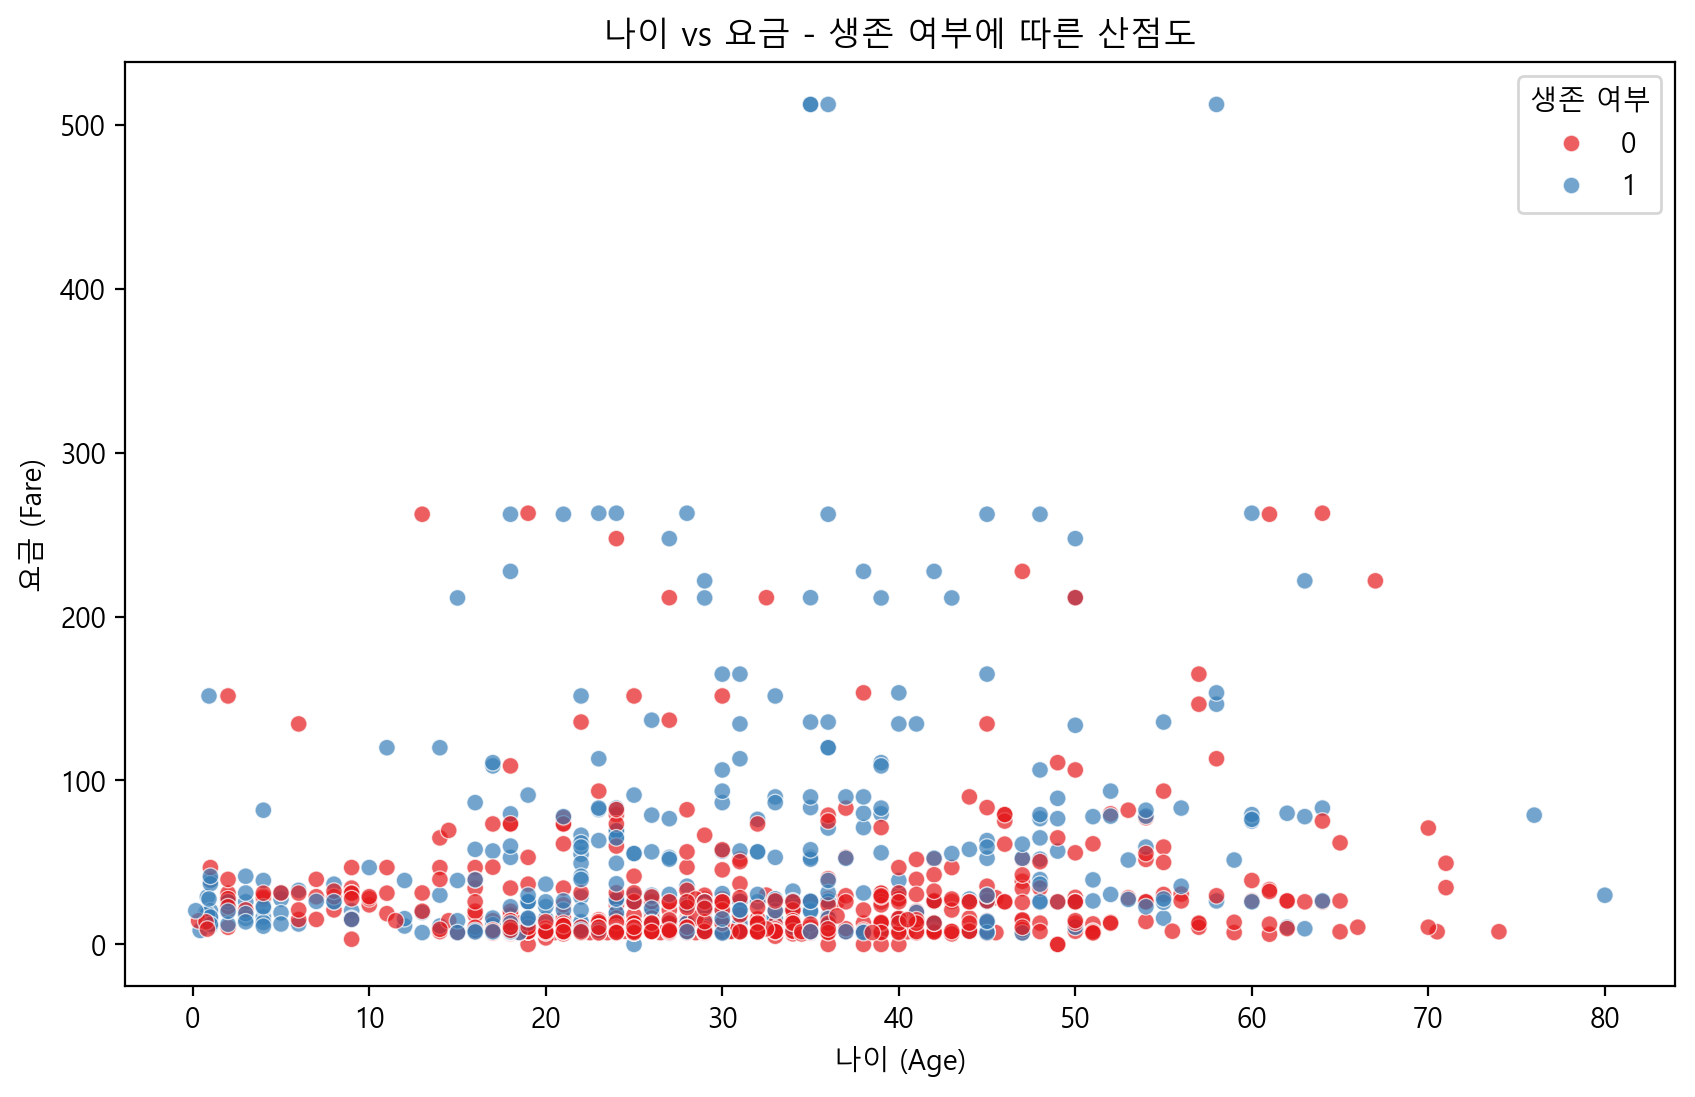

In [14]:
# 산점도: 나이 vs 요금, 생존 여부 색상 구분
plt.figure(figsize=(10, 6))
sns.scatterplot(data= titanic, x='Age', y='Fare', hue='Survived', palette='Set1', alpha=0.7)
plt.title('나이 vs 요금 - 생존 여부에 따른 산점도')
plt.xlabel('나이 (Age)')
plt.ylabel('요금 (Fare)')
plt.legend(title='생존 여부')
plt.show()

나이대로 보면 10대가 가장 많이 생존 했고 요금이 100이 넘어가면 생존율이 높은 것을 확인 가능하다. 

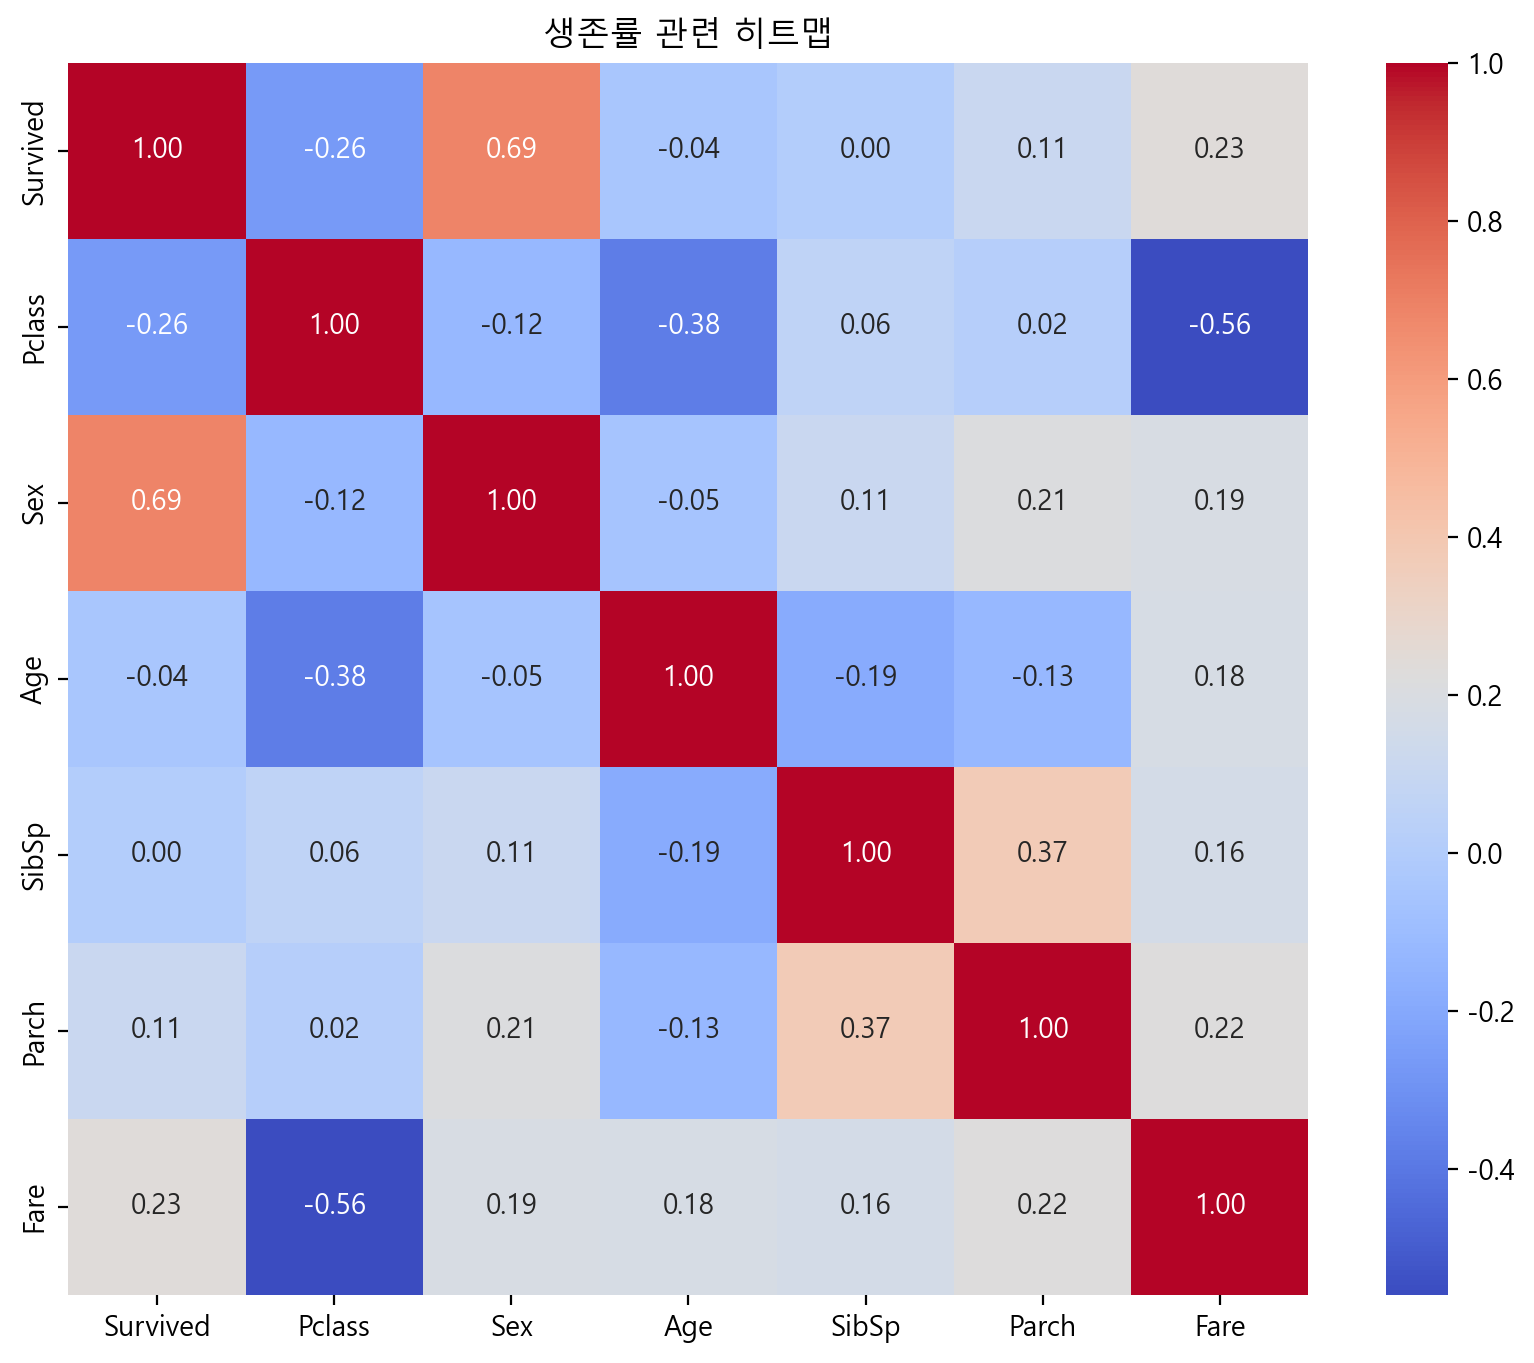

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 결측값 채우기 (단순 처리)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# 성별 숫자 인코딩
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
corr = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('생존률 관련 히트맵')
plt.show()


상관 관계에 따른 히트맵을 보면 성별, 좌석, 동승자 순으로 생존율이 높음을 알 수 있다. 